***

# <center> Data Project 1

***

    
### The goal for this project is to use a Kaggle dataset on two crypto currencies (Bitcoin and Ethereum) and visualize some key features about the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

***

# Load in the Crypto Currency data from Kaggle

We gathered the data from Coinmarketcap a free API source

The data we will be observing from each coin is:

- Date : Date of observation
- Symbol : Investment symbol of the currency
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

***

## Bitcoin

In [4]:
#Reading in the cvs file with all the data and transforming Date into a Float Variable
BTC = pd.read_csv('coin_Bitcoin.csv', parse_dates = ['Date'])

In [5]:
#Dropping Names column 
BTC.drop(columns = "Name", inplace = True)

#Dropping Symbol column 
#BTC.drop(columns = "Symbol", inplace = True)

#Drop Sno (Sno is like an id variable)
#Since it is a time series data set we can use the 'Date' variable to act as an id/index varibale

BTC.drop(columns = "Sno", inplace = True)

#Drop BTC obeservations where Volume = 0 
#We had some missing values for 'Volume'
BTC.drop(BTC.index[BTC['Volume'] == 0], inplace = True)


In [9]:
#print(BTC.head(10))

In [7]:
#print(BTC.tail(10))

In [8]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 242 to 2990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     2749 non-null   object        
 1   Date       2749 non-null   datetime64[ns]
 2   High       2749 non-null   float64       
 3   Low        2749 non-null   float64       
 4   Open       2749 non-null   float64       
 5   Close      2749 non-null   float64       
 6   Volume     2749 non-null   float64       
 7   Marketcap  2749 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 193.3+ KB


### Bitcoin
- We have 2749 observations
- Data ranges from Dec. 27, 2015 to July 6, 2021

***

## Ethereum

In [13]:
#reading in the Eth data from a csv file and parsing the dates to make them a float varibale
ETH = pd.read_csv('coin_Ethereum.csv', parse_dates = ['Date'])

In [14]:
#Dropping Names column 
ETH.drop(columns = "Name", inplace = True)

#Dropping Symbol column 
#ETH.drop(columns = "Symbol", inplace = True)

#Drop 'Sno' which is an id varibale for each observation
ETH.drop(columns = "SNo", inplace = True)

In [15]:
#print(ETH.head())

In [16]:
#print(ETH.tail())

In [17]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     2160 non-null   object        
 1   Date       2160 non-null   datetime64[ns]
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Open       2160 non-null   float64       
 5   Close      2160 non-null   float64       
 6   Volume     2160 non-null   int64         
 7   Marketcap  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 135.1+ KB


### Ethereum
- We have 2160 observations
- We have data from July 8, 2015 to June 6, 2021

***

# Summary Statistics
## Bitcoin

In [18]:
BTC.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2749.0,7.477294e+03,1.196953e+04,2.117310e+02,5.082200e+02,3.743388e+03,9.164362e+03,6.486310e+04
Low,2749.0,7.036728e+03,1.117069e+04,1.715100e+02,4.829520e+02,3.619182e+03,8.727090e+03,6.220896e+04
Open,2749.0,7.268362e+03,1.160357e+04,1.768970e+02,4.954550e+02,3.671370e+03,8.912524e+03,6.352375e+04
Close,2749.0,7.280272e+03,1.161379e+04,1.781030e+02,4.956660e+02,3.671204e+03,8.909954e+03,6.350346e+04
Volume,2749.0,1.186644e+10,1.941175e+10,2.857830e+06,4.872260e+07,2.219410e+09,1.757206e+10,3.509680e+11
Marketcap,2749.0,1.312580e+11,2.169847e+11,2.444379e+09,6.944861e+09,6.406376e+10,1.589500e+11,1.186360e+12


### Bitcoin Close values 
- The average 'close' value over the 6 year period is 7,280 with a minimum value of 1,781 and a max value of 63,503
- The standard deviation for 'close' prices are 11,614


In [19]:
#generate a scaler variable, we might not use this bc we can manually convert each variable to the logged value
#scaler doesnt seem to like the date variable and I don't want to drop it and lose the time-series index element of the data
scaler=StandardScaler()

In [20]:
# apply log(x+1) to values in float columns
to_log = ['High', 'Low', 'Open', 'Close', 'Volume', "Marketcap"]
BTC_log = BTC[to_log].applymap(lambda x: np.log(x+1))
    

In [21]:
print(BTC_log.head(10))

#looks like the log transformation worked

         High       Low      Open     Close     Volume  Marketcap
242  6.657382  6.571723  6.638934  6.601325  17.662733  22.915522
243  6.617483  6.560111  6.605271  6.591441  17.296929  22.905931
244  6.619553  6.572898  6.591742  6.614793  16.760544  22.929572
245  6.643269  6.608324  6.609821  6.629535  16.846016  22.944334
246  6.635395  6.605528  6.635054  6.626731  16.855131  22.941526
247  6.654603  6.628002  6.628002  6.649503  16.928555  22.964327
248  6.710901  6.644063  6.652140  6.688840  17.465896  23.003715
249  6.727611  6.672185  6.689413  6.708963  17.448087  23.023862
250  6.757525  6.687944  6.714498  6.757525  17.453228  23.072483
251  6.860035  6.751709  6.756409  6.840044  18.104579  23.155093


High
Skew : 2.89


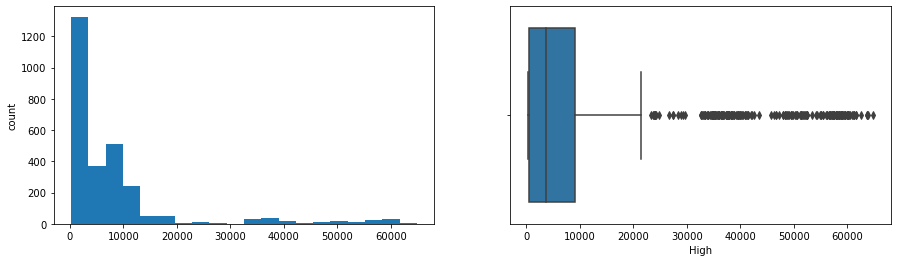

Low
Skew : 2.91


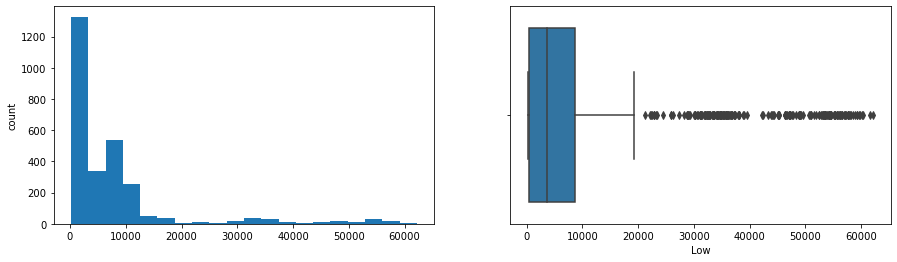

Open
Skew : 2.9


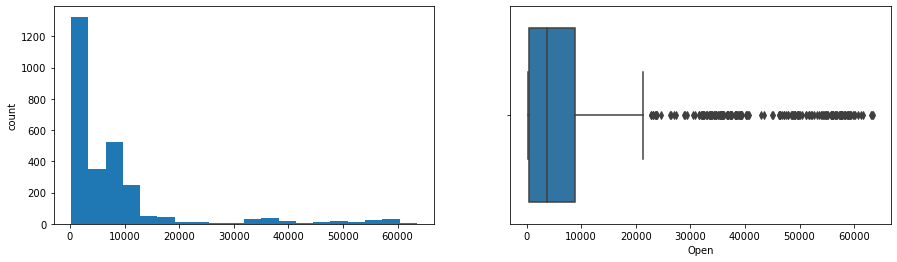

Close
Skew : 2.89


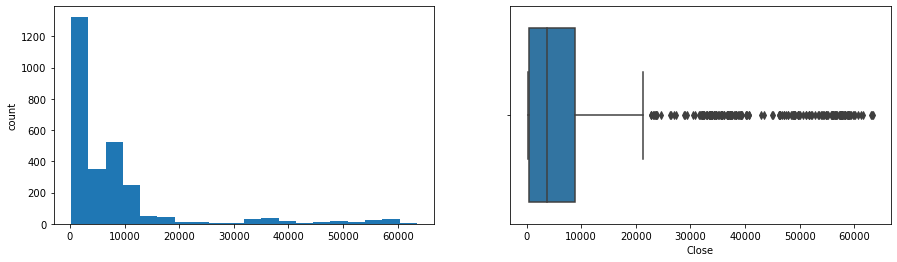

Volume
Skew : 3.62


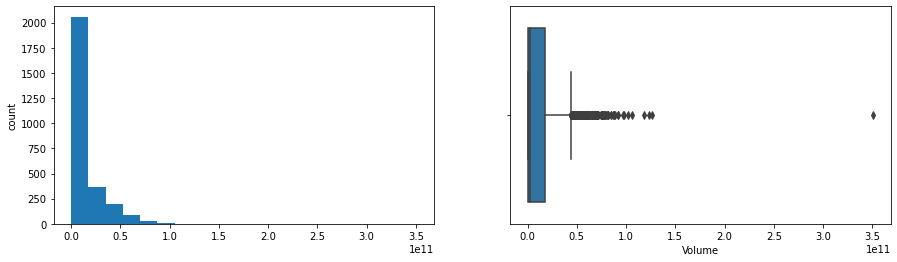

Marketcap
Skew : 2.94


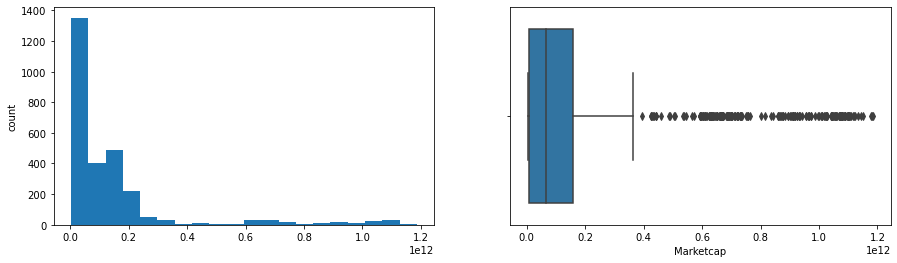

In [158]:
#Observe distribution for each numeric column, raw values
for col in BTC.columns[2:]:
    print(col)
    print('Skew :',round(BTC[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    BTC[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=BTC[col])
    plt.show()

High
Skew : 0.07


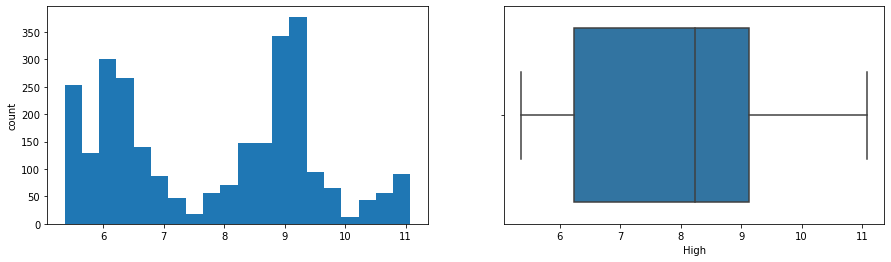

Low
Skew : 0.06


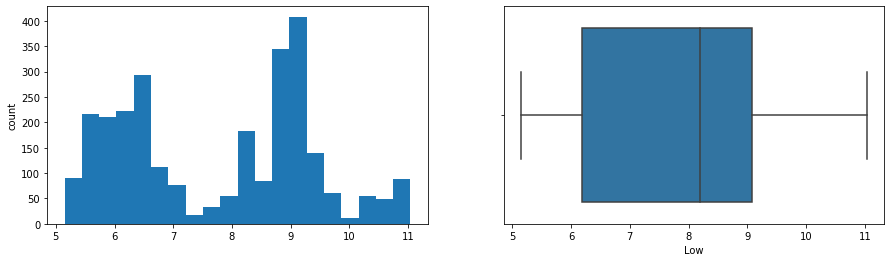

Open
Skew : 0.07


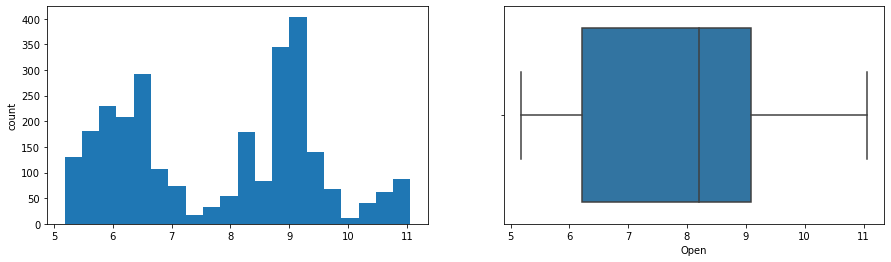

Close
Skew : 0.07


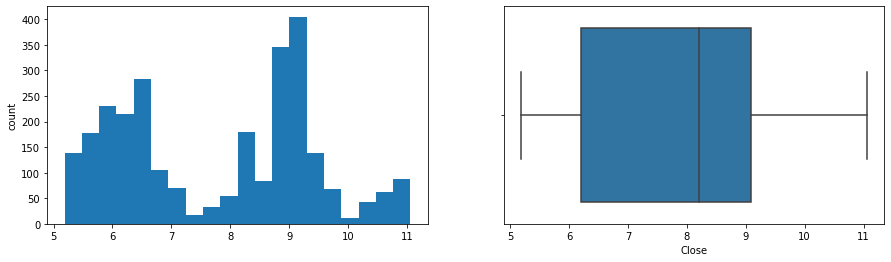

Volume
Skew : -0.11


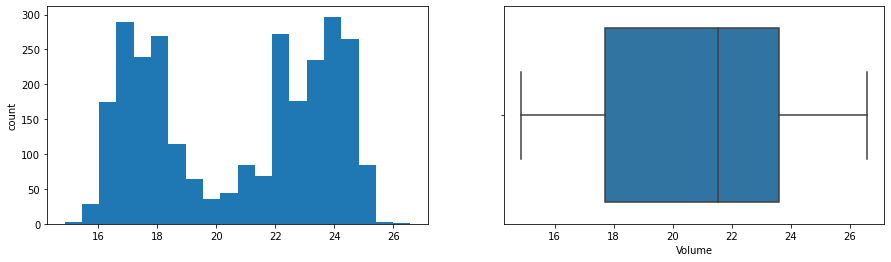

Marketcap
Skew : 0.05


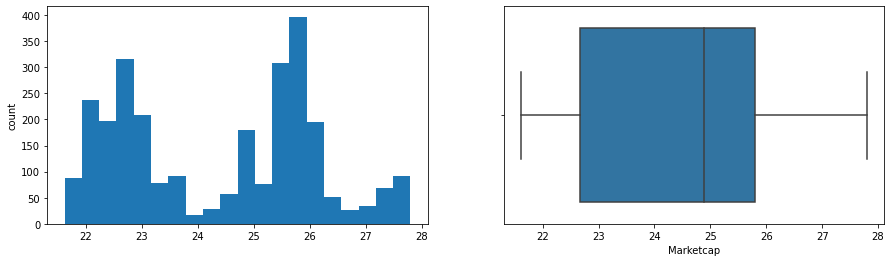

In [159]:
#Observe distribution for each numeric column, Log values
for col in BTC_log.columns[0:]:
    print(col)
    print('Skew :',round(BTC_log[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    BTC_log[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=BTC_log[col])
    plt.show()

### Raw Bitcoin vs Log Bitcoin
- In the raw data each vairbale has a significant right skew
- After converting the values to the logged values the box-plots looks more normal and the skew has practically vanished
- In the logged values' histogram we can see the distribution for each varibale forms a bimodial distribution
- In the raw data there is a huge outlire in 'Volume', lets try to fugure out what happened that day

In [23]:
BTC['Volume'].idxmax()
#use idmax command to find the id value where the 'Volume' was the highest and find which date the observation was from

2860

In [24]:
BTC.loc[2860:,]
#use loc to find the row, then observe the date with the mathcing id

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2860,BTC,2021-02-26,48370.78526,44454.84211,47180.46405,46339.76008,3.509680e+11,8.637520e+11
2861,BTC,2021-02-27,48253.27010,45269.02577,46344.77224,46188.45128,4.591095e+10,8.609780e+11
2862,BTC,2021-02-28,46716.43099,43241.61823,46194.01635,45137.77047,5.344389e+10,8.414290e+11
2863,BTC,2021-03-01,49784.01529,45115.09311,45159.50305,49631.24137,5.389130e+10,9.252360e+11
2864,BTC,2021-03-02,50127.50988,47228.84535,49612.10704,48378.98805,4.753090e+10,9.019340e+11
...,...,...,...,...,...,...,...,...
2986,BTC,2021-07-02,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11
2987,BTC,2021-07-03,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11
2988,BTC,2021-07-04,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11
2989,BTC,2021-07-05,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11


- Feburary 26, 2021 Bitcoin hit its largest volume trading day to date
- Seems the price stayed relatively stable so there wasn't a huge sell off or purchase

- According to Bitcoin's ledger it was a huge 24hrs for Bitcoin transactions 
    - 21,317 unique bitcoins traded wallets that day 
    - Market outlook that day seemed long on Bitcoin as the price grew the during the following week 
    - Feb 25, 2021 Bloomberg article mentioned Elon Musk vs Bill Gates stance on Bitcoin and crypto currencies 
    - Gates criticized Elon's move to invest 1.5 billion Tesla stock into Bitcoin

***

### Ethereum

In [25]:
ETH.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2160.0,3.982586e+02,6.280823e+02,4.829880e-01,1.426522e+01,2.051246e+02,3.964946e+02,4.362351e+03
Low,2160.0,3.655926e+02,5.666115e+02,4.208970e-01,1.319095e+01,1.933027e+02,3.751468e+02,3.785849e+03
Open,2160.0,3.828799e+02,5.997199e+02,4.315890e-01,1.375760e+01,1.984251e+02,3.862649e+02,4.174636e+03
Close,2160.0,3.839107e+02,6.010788e+02,4.348290e-01,1.381920e+01,1.986437e+02,3.864353e+02,4.168701e+03
Volume,2160.0,7.057058e+09,1.064526e+10,1.021280e+05,3.825102e+07,2.148880e+09,9.629136e+09,8.448291e+10
Marketcap,2160.0,4.172084e+10,6.909183e+10,3.221363e+07,1.135576e+09,2.070063e+10,4.231010e+10,4.828820e+11


### Ethereum close values
- Over the 6 year period we see that the average 'close' price for Ethereum was 384 
- Minimum value of 43 and a Maximum value of 4,169
- Standard deviations for the 'close' values are 601

High
Skew : 2.98


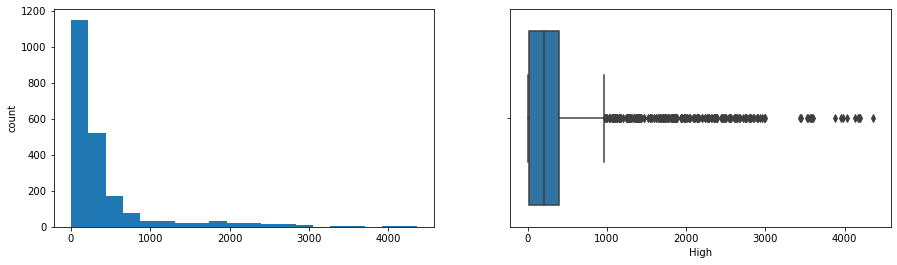

Low
Skew : 2.93


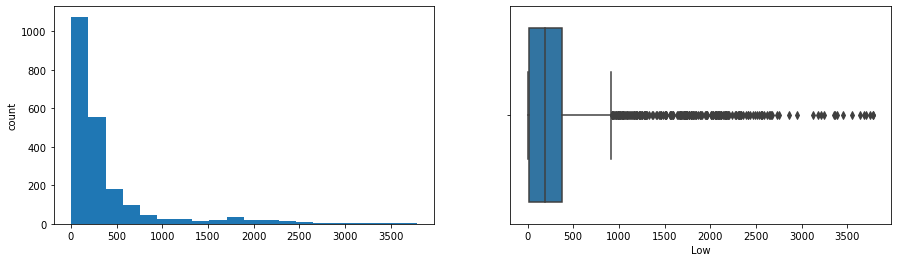

Open
Skew : 2.96


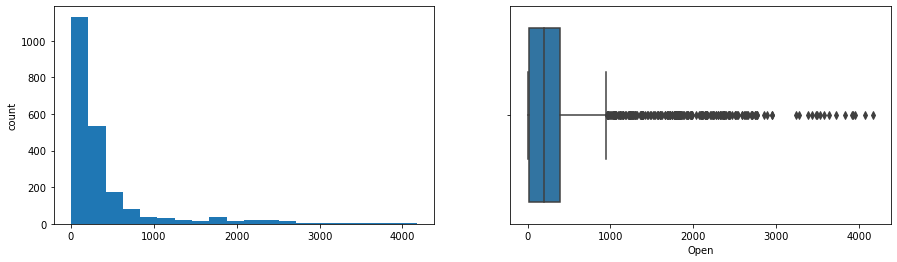

Close
Skew : 2.95


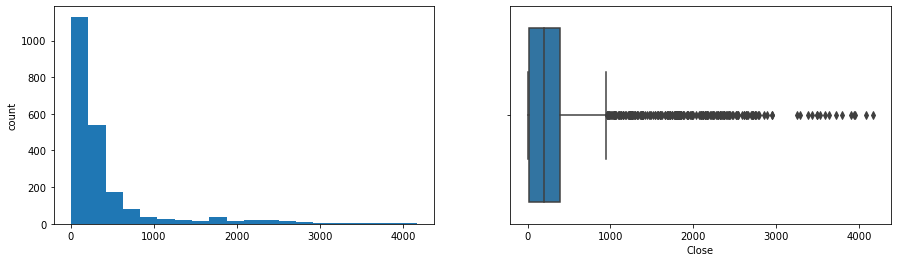

Volume
Skew : 2.44


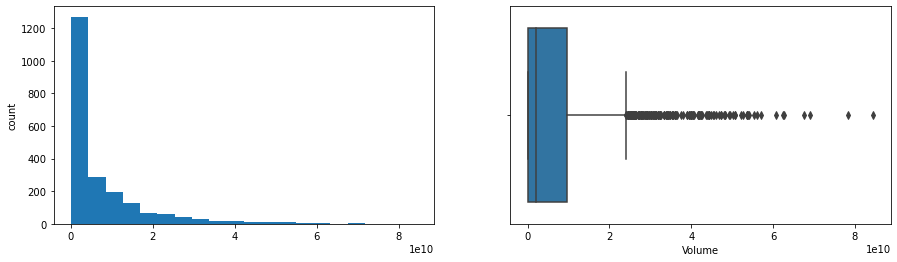

Marketcap
Skew : 3.1


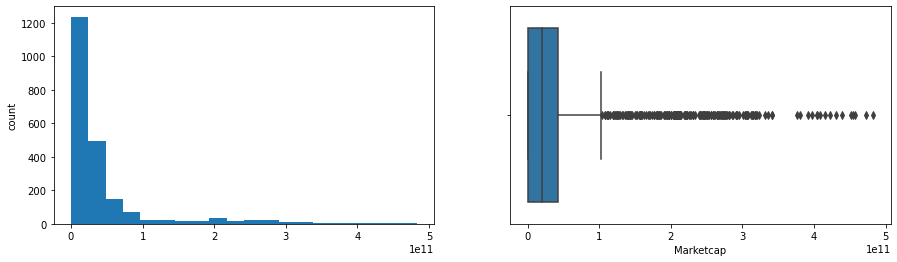

In [26]:
#Observe distribution for each numeric column, raw values
for col in ETH.columns[2:]:
    print(col)
    print('Skew :',round(ETH[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    ETH[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=ETH[col])
    plt.show()

In [33]:
# apply log(x+1) to values in float columns
to_log = ['High', 'Low', 'Open', 'Close', 'Volume', "Marketcap"]
ETH_log = ETH[to_log].applymap(lambda x: np.log(x+1))

In [34]:
#print(ETH_log.head())

#we now have logged values foe Ethereum

High
Skew : -0.66


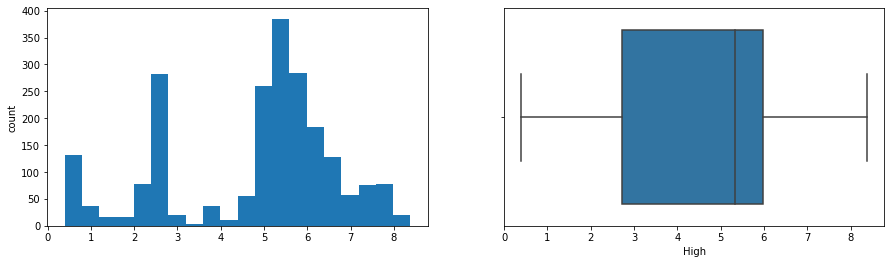

Low
Skew : -0.67


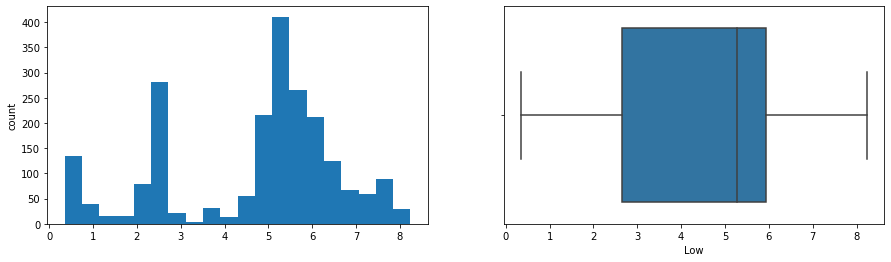

Open
Skew : -0.66


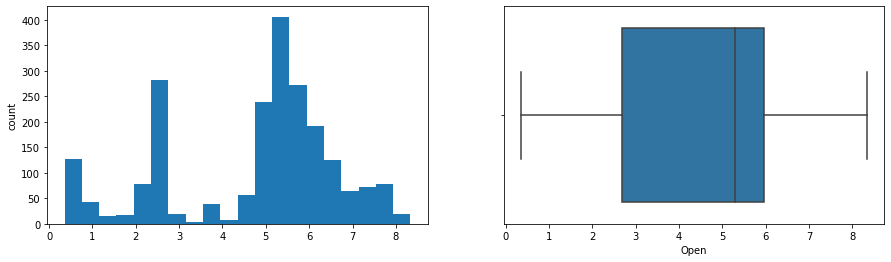

Close
Skew : -0.66


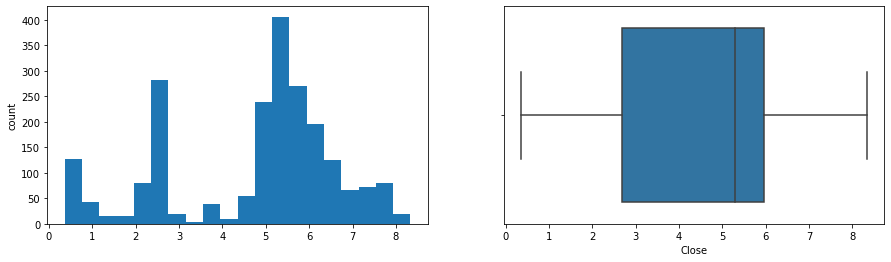

Volume
Skew : -0.86


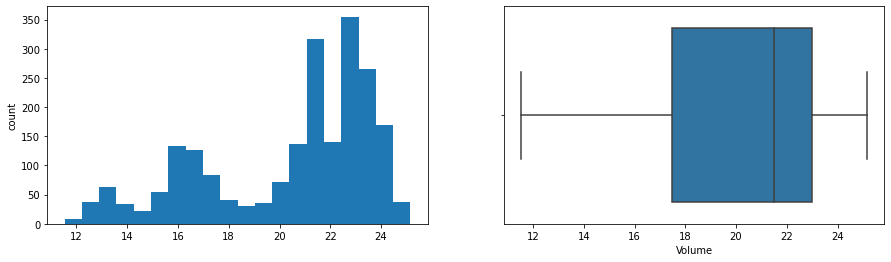

Marketcap
Skew : -0.86


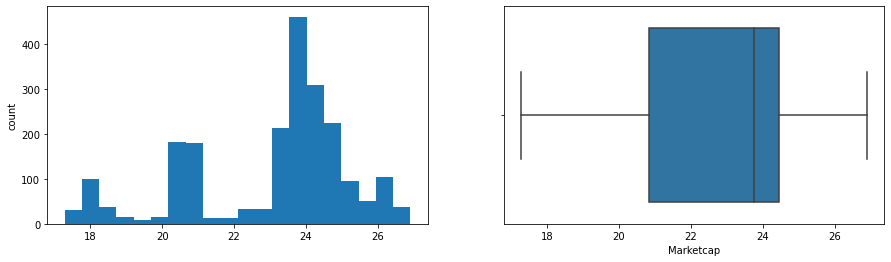

In [35]:
#Observe distribution for each numeric column, Log values
for col in ETH_log.columns[0:]:
    print(col)
    print('Skew :',round(ETH_log[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    ETH_log[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=ETH_log[col])
    plt.show()

### Raw ETH vs Log ETH
- We can see in the raw values for Ethereum the distribution is highly right skewed with no significant single outlires in each varibale
- For the logged values ETH forms some bimodial distributions as well as a seemingly left skewed distribution in Volume
- The box plots for logged ETH seem to be more approximatley normal

***

## Merge the datasets

#### To see how Bitcoin and Ethereum compare we will combine the dataframes

In [41]:
BTC_ETH = pd.concat([BTC, ETH])

In [46]:
#BTC_ETH.info()

## Plotting the data

In [47]:
BTC_ETH_wide_close = BTC_ETH.pivot("Date", "Symbol", "Close")
#print(BTC_ETH_wide_close.head())
BTC_ETH_wide_close.dropna(inplace = True)
print(BTC_ETH_wide_close.head())
BTC_ETH_wide_close.info()

Symbol             BTC       ETH
Date                            
2015-08-08  260.997009  0.753325
2015-08-09  265.083008  0.701897
2015-08-10  264.470001  0.708448
2015-08-11  270.385986  1.067860
2015-08-12  266.376007  1.217440
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2015-08-08 to 2021-07-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2160 non-null   float64
 1   ETH     2160 non-null   float64
dtypes: float64(2)
memory usage: 50.6 KB


#### We then merged the two data sets using the close prices as the main level of price, we dropped the values of Ethereum where data was missing, we now have BTC and ETH close prices from July 8th 2015 to June 6th 2021

***

## Close Prices

<AxesSubplot:xlabel='Date'>

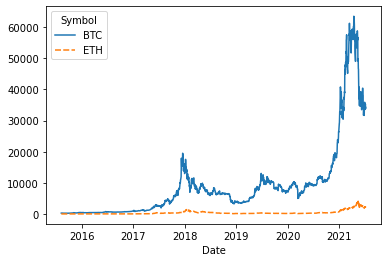

In [48]:
sns.lineplot(data=BTC_ETH_wide_close)

- This displays the daily 'close' prices for each coin
- Since the values of the two coins are widely spread we should take the log values for each coin in order to visuals the similarties

In [49]:
BTC_ETH_close_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_close), columns=BTC_ETH_wide_close.columns)
#BTC_ETH_close_scaled.head()

<AxesSubplot:>

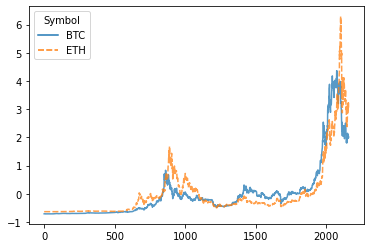

In [50]:
sns.lineplot(data=BTC_ETH_close_scaled, alpha = .75)

- After taking the logged close prices was observe the differences and similarties more clearly
- It seems the coins move together and the price of both coins are linked
- Ethereum seems to have larger and more frequent 'spikes' in prices leading me to believe Ethereum is a more volatile coin
- We can obeserve the volatilities for each coin later

***

## Market Volume

In [51]:
BTC_ETH_wide_volume = BTC_ETH.pivot("Date", "Symbol", "Volume")
BTC_ETH_wide_volume.dropna(inplace = True)
#BTC_ETH_wide_volume.head()

<AxesSubplot:xlabel='Date'>

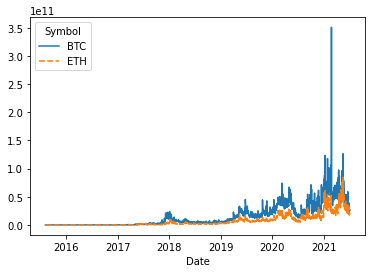

In [52]:
sns.lineplot(data=BTC_ETH_wide_volume)

#### Again we will take the logged values for each coin to get a more accurate comparison

In [53]:
BTC_ETH_volume_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_volume), columns=BTC_ETH_wide_volume.columns)
#BTC_ETH_volume_scaled.head()

<AxesSubplot:>

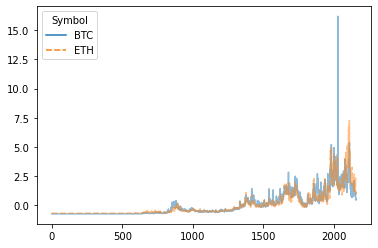

In [54]:
sns.lineplot(data=BTC_ETH_volume_scaled, alpha = .5)

- We can see that the 'Volume' traded for each coin are similar however Bitcoin has a much larger volume, i.e. more people are trading Bitcoin compared to Ethereum
- The large spike in Bitcoins Volume coincides with the date we observed before (Feb 26, 2021)

***

## Market Cap

In [55]:
BTC_ETH_wide_cap = BTC_ETH.pivot("Date", "Symbol", "Marketcap")
BTC_ETH_wide_cap.dropna(inplace = True)
#BTC_ETH_wide_cap.head()

<AxesSubplot:xlabel='Date'>

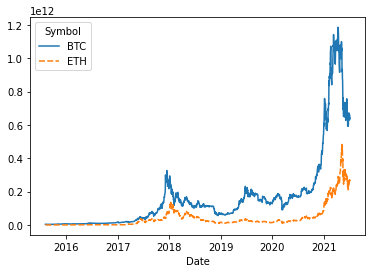

In [56]:
sns.lineplot(data=BTC_ETH_wide_cap)

- Now we will observe the logged values of each coin's 'Market Cap'

In [57]:
BTC_ETH_cap_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_cap), columns=BTC_ETH_wide_cap.columns)
#BTC_ETH_cap_scaled.head()

<AxesSubplot:>

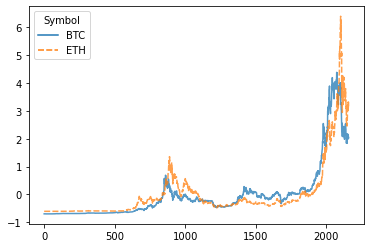

In [58]:
sns.lineplot(data=BTC_ETH_cap_scaled, alpha = .75)

- We can see that the logged 'close' price graph and the logged 'Market Cap' graph are very similar, this makes sence due to 'close' prices or price of an asset being a component of an assets market cap
- Market Cap is the calculation of an assets price times the volume of shares outstanding

***

## Moving Average
- We can use the moving average to find trends in volatile data

<AxesSubplot:xlabel='Date', ylabel='MA30'>

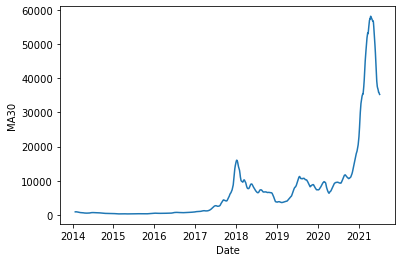

In [59]:
#30 & 100 Day Moving Avgerage
BTC['MA30'] = BTC['Close'].rolling(30).mean()
BTC['MA100'] = BTC['Close'].rolling(100).mean()

sns.lineplot(data = BTC, x= "Date", y= "MA30" )

<AxesSubplot:>

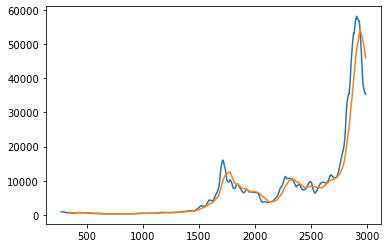

In [60]:
BTC['MA30'].plot()
BTC['MA100'].plot()


<AxesSubplot:xlabel='Date', ylabel='MA30'>

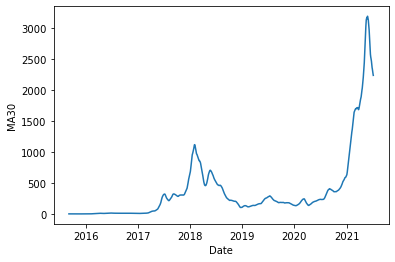

In [61]:
#30 & 100 Day Moving Average
ETH['MA30'] = ETH['Close'].rolling(30).mean()
ETH['MA100'] = ETH['Close'].rolling(100).mean()
sns.lineplot(data = ETH, x ="Date", y = "MA30")


<AxesSubplot:>

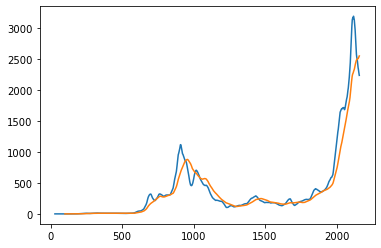

In [62]:
ETH['MA30'].plot()
ETH['MA100'].plot()

***

## Volatility

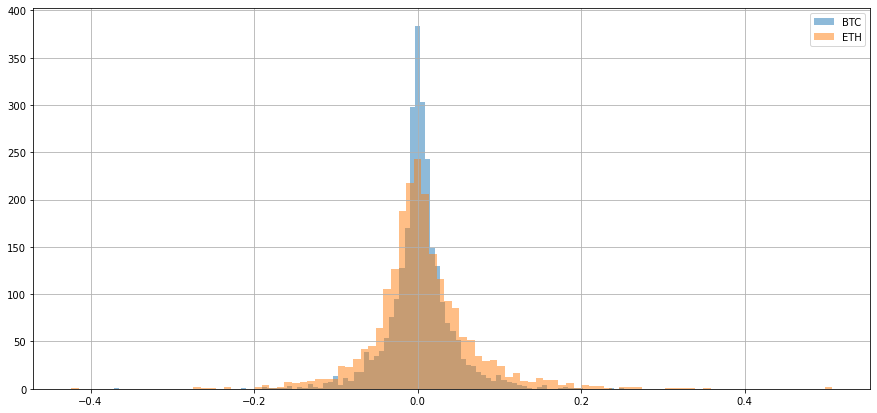

In [63]:
#Volatility
BTC['returns'] = (BTC['Close']/BTC['Close'].shift(1)) -1
ETH['returns'] = (ETH['Close']/ETH['Close'].shift(1))-1
BTC['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (15,7))
ETH['returns'].hist(bins = 100, label = 'ETH', alpha = 0.5)

plt.legend()

- We can see that the percentage change in price for Ethereum has the wider histogram which indicates Ethereum is the more volatile crypto currency